## Is it a bird?

In [1]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [2]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai

## Step 1: Download images of birds and non-birds

In [3]:
# Skip this cell if you already have duckduckgo_search installed
!pip install -Uqq duckduckgo_search

In [7]:
imgs = L(ddg_images('dogs', max_results=200))
imgs

/usr/local/lib/python3.9/dist-packages/duckduckgo_search/compat.py:40: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")


(#90) [{'title': 'Dog HD Wallpaper | Background Image | 1920x1440 | ID:334685 - Wallpaper ...', 'image': 'https://images7.alphacoders.com/334/334685.jpg', 'thumbnail': 'https://tse3.mm.bing.net/th?id=OIP.Ddk103lZO4OEM9Rjk9sg2QHaFj&pid=Api', 'url': 'https://wall.alphacoders.com/big.php?i=334685', 'height': 1440, 'width': 1920, 'source': 'Bing'},{'title': 'Top 10 Popular Small Dog Breeds', 'image': 'https://fthmb.tqn.com/8ZHdLsYCzE7j8nDTO0y61UtynTA=/2094x1396/filters:fill(auto,1)/portrait-if-a-spitz-pomeranian_t20_v3o29E-5ae9bbdca18d9e0037d95983.jpg', 'thumbnail': 'https://tse2.mm.bing.net/th?id=OIP.YP_JGs0RqSKyxwjkZpiPqQHaE8&pid=Api', 'url': 'https://www.thesprucepets.com/top-small-dog-breeds-1118155', 'height': 1396, 'width': 2094, 'source': 'Bing'},{'title': '9 Science-Backed Reasons to Own a Dog : ScienceAlert', 'image': 'https://static.businessinsider.com/image/5484d9d1eab8ea3017b17e29/image.jpg', 'thumbnail': 'https://tse4.mm.bing.net/th?id=OIP.vpENuVG6_Ke79c0shGAHMQHaFn&pid=Api', 

In [26]:
L??

Init signature: L(items=None, *rest, use_list=False, match=None)
Source:        
class L(GetAttr, CollBase, metaclass=_L_Meta):
    "Behaves like a list of `items` but can also index with list of indices or masks"
    _default='items'
    def __init__(self, items=None, *rest, use_list=False, match=None):
        if (use_list is not None) or not is_array(items):
            items = listify(items, *rest, use_list=use_list, match=match)
        super().__init__(items)

    @property
    def _xtra(self): return None
    def _new(self, items, *args, **kwargs): return type(self)(items, *args, use_list=None, **kwargs)
    def __getitem__(self, idx): return self._get(idx) if is_indexer(idx) else L(self._get(idx), use_list=None)
    def copy(self): return self._new(self.items.copy())

    def _get(self, i):
        if is_indexer(i) or isinstance(i,slice): return getattr(self.items,'iloc',self.items)[i]
        i = mask2idxs(i)
        return (self.items.iloc[list(i)] if hasattr(self.items,'iloc

In [11]:
imgs2 = L(DDGS().images('dogs', max_results=200)).itemgot('image')
imgs2

(#200) ['https://images7.alphacoders.com/334/334685.jpg','https://fthmb.tqn.com/8ZHdLsYCzE7j8nDTO0y61UtynTA=/2094x1396/filters:fill(auto,1)/portrait-if-a-spitz-pomeranian_t20_v3o29E-5ae9bbdca18d9e0037d95983.jpg','https://static.businessinsider.com/image/5484d9d1eab8ea3017b17e29/image.jpg','https://cdn.animalencyclopedia.info/wp-content/uploads/2020/03/popular-dogs-2.jpg','https://wallpapercave.com/wp/OJOyj1U.jpg','http://hdqwalls.com/wallpapers/cane-corso-dog-puppy-4k-hd-do.jpg','http://static4.businessinsider.com/image/521cd2136bb3f7df4c7c0a06-1200-924/maltese-puppy.jpg','http://2.bp.blogspot.com/-PIWqtE6GA34/UpYSJwcGdqI/AAAAAAAADFQ/--8tRwUVaVg/s1600/beautiful-puppies-dogs-2014.jpg','https://acmecanine.com/wp-content/uploads/2021/01/dogs.jpg','http://cdn.sheknows.com/articles/2015/02/Mike_C/SK_US/Yorkshire_Terrier.jpg'...]

In [14]:
from duckduckgo_search import ddg_images, DDGS
from fastcore.all import *

def search_images(term, max_images=200): return L(DDGS().images(term, max_results=max_images)).itemgot('image')

In [15]:
urls = search_images('bird photos', max_images=1)
urls[0]

'https://images.alphacoders.com/492/492674.jpg'

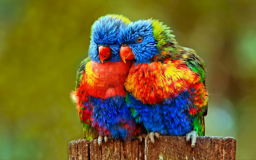

In [16]:
from fastdownload import download_url
dest = 'bird.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [24]:
download_url??

Signature: download_url(url, dest=None, timeout=None, show_progress=True)
Source:   
def download_url(url, dest=None, timeout=None, show_progress=True):
    "Download `url` to `dest` and show progress"
    pbar = progress_bar([])
    def progress(count=1, bsize=1, tsize=None):
        pbar.total = tsize
        pbar.update(count*bsize)
    return urlsave(url, dest, reporthook=progress if show_progress else None, timeout=timeout)
File:      /usr/local/lib/python3.9/dist-packages/fastdownload/core.py
Type:      function


In [21]:
Image??

Type:        module
String form: <module 'PIL.Image' from '/usr/local/lib/python3.9/dist-packages/PIL/Image.py'>
File:        /usr/local/lib/python3.9/dist-packages/PIL/Image.py
Source:     
#
# The Python Imaging Library.
# $Id$
#
# the Image class wrapper
#
# partial release history:
# 1995-09-09 fl   Created
# 1996-03-11 fl   PIL release 0.0 (proof of concept)
# 1996-04-30 fl   PIL release 0.1b1
# 1999-07-28 fl   PIL release 1.0 final
# 2000-06-07 fl   PIL release 1.1
# 2000-10-20 fl   PIL release 1.1.1
# 2001-05-07 fl   PIL release 1.1.2
# 2002-03-15 fl   PIL release 1.1.3
# 2003-05-10 fl   PIL release 1.1.4
# 2005-03-28 fl   PIL release 1.1.5
# 2006-12-02 fl   PIL release 1.1.6
# 2009-11-15 fl   PIL release 1.1.7
#
# Copyright (c) 1997-2009 by Secret Labs AB.  All rights reserved.
# Copyright (c) 1995-2009 by Fredrik Lundh.
#
# See the README file for information on usage and redistribution.
#

import atexit
import builtins
import io
import logging
import math
import os
import re


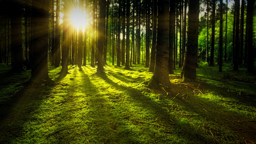

In [20]:
download_url(search_images('forest photos', max_images=1)[0], 'forest.jpg', show_progress=False)
Image.open('forest.jpg').to_thumb(256,256)

In [33]:
searches = 'forest','bird'
path = Path('bird_or_not')
path/'forest'

Path('bird_or_not/forest')

In [27]:
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} sun photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

In [30]:
Path.mkdir??

Signature: Path.mkdir(self, mode=511, parents=False, exist_ok=False)
Source:   
    def mkdir(self, mode=0o777, parents=False, exist_ok=False):
        """
        Create a new directory at this given path.
        """
        try:
            self._accessor.mkdir(self, mode)
        except FileNotFoundError:
            if not parents or self.parent == self:
                raise
            self.parent.mkdir(parents=True, exist_ok=True)
            self.mkdir(mode, parents=False, exist_ok=exist_ok)
        except OSError:
            # Cannot rely on checking for EEXIST, since the operating system
            # could give priority to other errors like EACCES or EROFS
            if not exist_ok or not self.is_dir():
                raise
File:      /usr/lib/python3.9/pathlib.py
Type:      function


## Step 2: Train our model

In [39]:
failed = verify_images(get_image_files(path))
failed?

Type:        L
String form: []
Length:      0
File:        ~/.local/lib/python3.9/site-packages/fastcore/foundation.py
Docstring:   Behaves like a list of `items` but can also index with list of indices or masks


In [35]:
failed.map?

Signature: failed.map(f, *args, **kwargs)
Docstring: Create new `L` with `f` applied to all `items`, passing `args` and `kwargs` to `f`
File:      ~/.local/lib/python3.9/site-packages/fastcore/foundation.py
Type:      method


In [38]:
failed.map(Path.unlink)

FileNotFoundError: [Errno 2] No such file or directory: 'bird_or_not/forest/272ed1bb-1c4b-4cf1-bef9-a35f7715088f.jpg'

In [42]:
len(failed)

0

In [40]:
DataBlock?

Init signature:
DataBlock(
    blocks: 'list' = None,
    dl_type: 'TfmdDL' = None,
    getters: 'list' = None,
    n_inp: 'int' = None,
    item_tfms: 'list' = None,
    batch_tfms: 'list' = None,
    *,
    get_items=None,
    splitter=None,
    get_y=None,
    get_x=None,
)
Docstring:      Generic container to quickly build `Datasets` and `DataLoaders`.
File:           ~/.local/lib/python3.9/site-packages/fastai/data/block.py
Type:           type
Subclasses:     


In [50]:
DataBlock.dataloaders??

Signature:
DataBlock.dataloaders(
    self,
    source,
    path: 'str' = '.',
    verbose: 'bool' = False,
    **kwargs,
) -> 'DataLoaders'
Docstring: Create a `DataLoaders` object from `source`
Source:   
    def dataloaders(self, 
        source, # The data source
        path:str='.', # Data source and default `Learner` path 
        verbose:bool=False, # Show verbose messages
        **kwargs
    ) -> DataLoaders:
        dsets = self.datasets(source, verbose=verbose)
        kwargs = {**self.dls_kwargs, **kwargs, 'verbose': verbose}
        return dsets.dataloaders(path=path, after_item=self.item_tfms, after_batch=self.batch_tfms, **kwargs)
File:      ~/.local/lib/python3.9/site-packages/fastai/data/block.py
Type:      function


In [44]:
get_image_files??

Signature: get_image_files(path, recurse=True, folders=None)
Source:   
def get_image_files(path, recurse=True, folders=None):
    "Get image files in `path` recursively, only in `folders`, if specified."
    return get_files(path, extensions=image_extensions, recurse=recurse, folders=folders)
File:      ~/.local/lib/python3.9/site-packages/fastai/data/transforms.py
Type:      function


In [46]:
RandomSplitter??

Signature: RandomSplitter(valid_pct=0.2, seed=None)
Source:   
def RandomSplitter(valid_pct=0.2, seed=None):
    "Create function that splits `items` between train/val with `valid_pct` randomly."
    def _inner(o):
        if seed is not None: torch.manual_seed(seed)
        rand_idx = L(list(torch.randperm(len(o)).numpy()))
        cut = int(valid_pct * len(o))
        return rand_idx[cut:],rand_idx[:cut]
    return _inner
File:      ~/.local/lib/python3.9/site-packages/fastai/data/transforms.py
Type:      function


In [48]:
parent_label??

Signature: parent_label(o)
Source:   
def parent_label(o):
    "Label `item` with the parent folder name."
    return Path(o).parent.name
File:      ~/.local/lib/python3.9/site-packages/fastai/data/transforms.py
Type:      function


In [51]:
Resize??

Init signature:
Resize(
    self,
    size: 'int | tuple',
    method: 'ResizeMethod' = 'crop',
    pad_mode: 'PadMode' = 'reflection',
    resamples=(<Resampling.BILINEAR: 2>, <Resampling.NEAREST: 0>),
    **kwargs,
)
Docstring:      A transform that before_call its state at each `__call__`
Source:        
@delegates()
class Resize(RandTransform):
    split_idx,mode,mode_mask,order = None,BILINEAR,NEAREST,1
    "Resize image to `size` using `method`"
    def __init__(self, 
        size:int|tuple, # Size to resize to, duplicated if one value is specified
        method:ResizeMethod=ResizeMethod.Crop, # A `ResizeMethod`
        pad_mode:PadMode=PadMode.Reflection, # A `PadMode`
        resamples=(BILINEAR, NEAREST), # Pillow `Image` resamples mode, resamples[1] for mask
        **kwargs
    ):
        size = _process_sz(size)
        store_attr()
        super().__init__(**kwargs)
        self.mode,self.mode_mask = resamples

    def before_call(self, 
        b, 
        split_idx:int

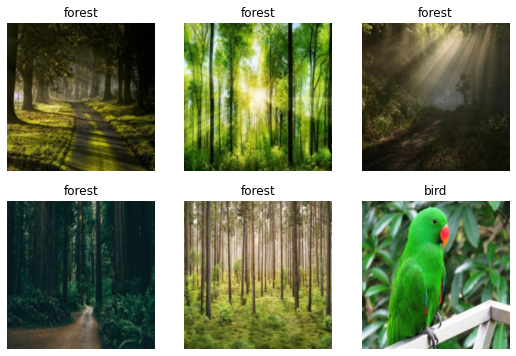

In [54]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

In [55]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.484508,0.034056,0.009050,00:09


epoch,train_loss,valid_loss,error_rate,time
0,0.118802,0.025913,0.009050,00:03
1,0.085993,0.036062,0.009050,00:03
2,0.055386,0.037390,0.004525,00:03


In [52]:
vision_learner?

Signature:
vision_learner(
    dls,
    arch,
    normalize=True,
    n_out=None,
    pretrained=True,
    loss_func=None,
    opt_func=<function Adam at 0x7fb878939e50>,
    lr=0.001,
    splitter=None,
    cbs=None,
    metrics=None,
    path=None,
    model_dir='models',
    wd=None,
    wd_bn_bias=False,
    train_bn=True,
    moms=(0.95, 0.85, 0.95),
    cut=None,
    init=<function kaiming_normal_ at 0x7fb8b6ea6040>,
    custom_head=None,
    concat_pool=True,
    pool=True,
    lin_ftrs=None,
    ps=0.5,
    first_bn=True,
    bn_final=False,
    lin_first=False,
    y_range=None,
    *,
    n_in=3,
)
Docstring: Build a vision learner from `dls` and `arch`
File:      ~/.local/lib/python3.9/site-packages/fastai/vision/learner.py
Type:      function


## Step 3: Use our model (and build your own!)

In [62]:
is_bird,_,probs = learn.predict(PILImage.create('bird.jpg'))
print(f"This is a: {is_bird}.")
print(f"Probability it's a bird: {probs[0]:.4f}")

This is a: bird.
Probability it's a bird: 0.9999


In [59]:
learn.predict?

Signature: learn.predict(item, rm_type_tfms=None, with_input=False)
Docstring: Prediction on `item`, fully decoded, loss function decoded and probabilities
File:      ~/.local/lib/python3.9/site-packages/fastai/learner.py
Type:      method
